#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Spectral embeddings

## Ejemplo 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from spectral_clustering import *

In [2]:
def plot_graph(X, knn_graph, data_toy=None, palet=None):    
    # crea los indices
    a, b = np.where(knn_graph>0)
    indices_temp = np.array([a,b]).T
    ix = indices_temp
    for i in range(indices_temp.shape[0]):
        test_elem = indices_temp[i,]
        temp = np.sum(np.isin(indices_temp,test_elem),axis=1)
        ix[temp==2,] = test_elem
        
    indices = np.unique(ix,axis=0)
    leg = 'brief'
    hue = 'cl'

    if data_toy is None:
        data_toy = pd.DataFrame(X)
        data_toy.columns = ['x1','x2']  
        data_toy = pd.DataFrame(data_toy).assign(cl = y)
        palet = None #['black']
        leg = None
        hue = None
    
    #fig, ax = plt.subplots(figsize=(8,8))
    sns.relplot(x='x1', y='x2', data = data_toy, hue= hue, palette=palet, s=150,legend = leg)
    #sns.scatterplot(x='x1', y='x2', data = data_toy, hue='cl', palette=palet, s=50,legend = 'brief')
    #for i in range(X.shape[0]):
    #    plt.text(X[i,0], X[i,1]+.1, i)
    
    for i in range(indices.shape[0]):
        coords = np.array([X[indices[i,0],:], X[indices[i,1],:]])
        #sns.lineplot(coords.T[0,], coords.T[1,], color='black',ax=ax)
        plt.plot(coords.T[0,], coords.T[1,], color='black')


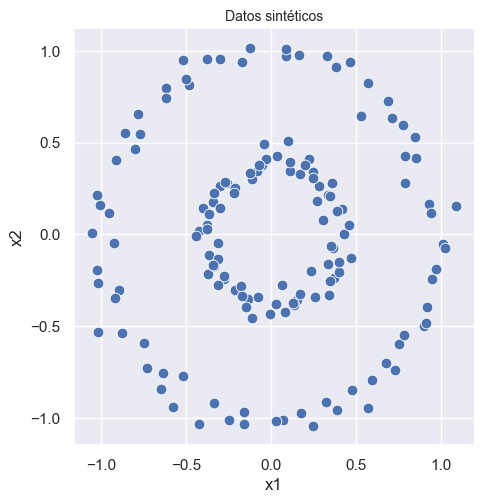

In [113]:
ndata = 150
X, y, custom_palette, kclust = get_dataset('dona', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, s=60, height=5)
plt.title('Datos sintéticos', fontsize=10);


### Parámetros para clústering espectral

In [115]:
knn = 3 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'L' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [116]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

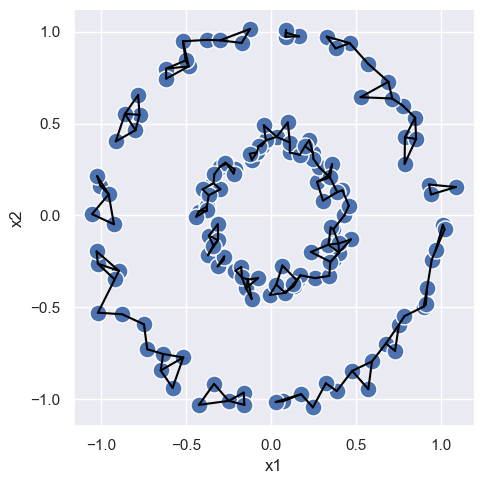

In [117]:
plot_graph(X,knn_graph)

Detalle con el grafo. Cuando usamos $k-$nn induce un grafo dirigido, por lo tanto, no es simétrico. Dos formas de solucionarlo es:
- ignorar las direcciones y considerar conexiones simétricas
- conexiones mútuas

### Matriz de Adyacencias o Afinidad

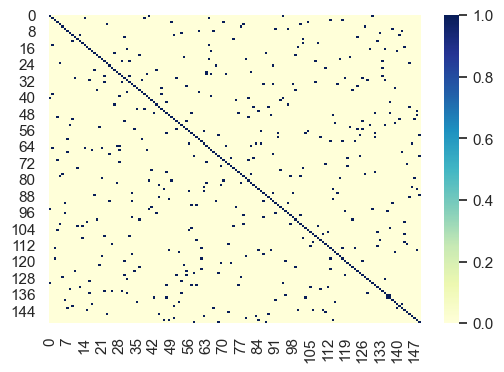

In [118]:
plt.figure(figsize=(6,4))
sns.heatmap(knn_graph, cmap="YlGnBu");

#### Matriz de adyacencias (afinidad) sin pesos. Solo muestra los componentes están conectados

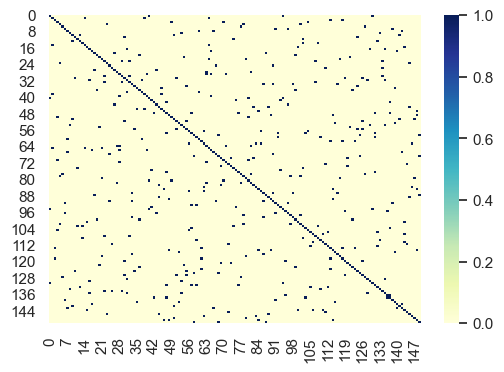

In [119]:
plt.figure(figsize=(6,4))
sns.heatmap(W, cmap="YlGnBu");

#### Matriz de adyacencias (afinidad) pesada usando distancia Gaussiana, es decir, con pesos $w_{i,j}=e^{\frac{-\Vert \mathbf{x}_i-\mathbf{x}_j \Vert^2}{2\sigma^2}}$ si $\mathbf{x}_i$ y $\mathbf{x}_j$ se conectan.

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

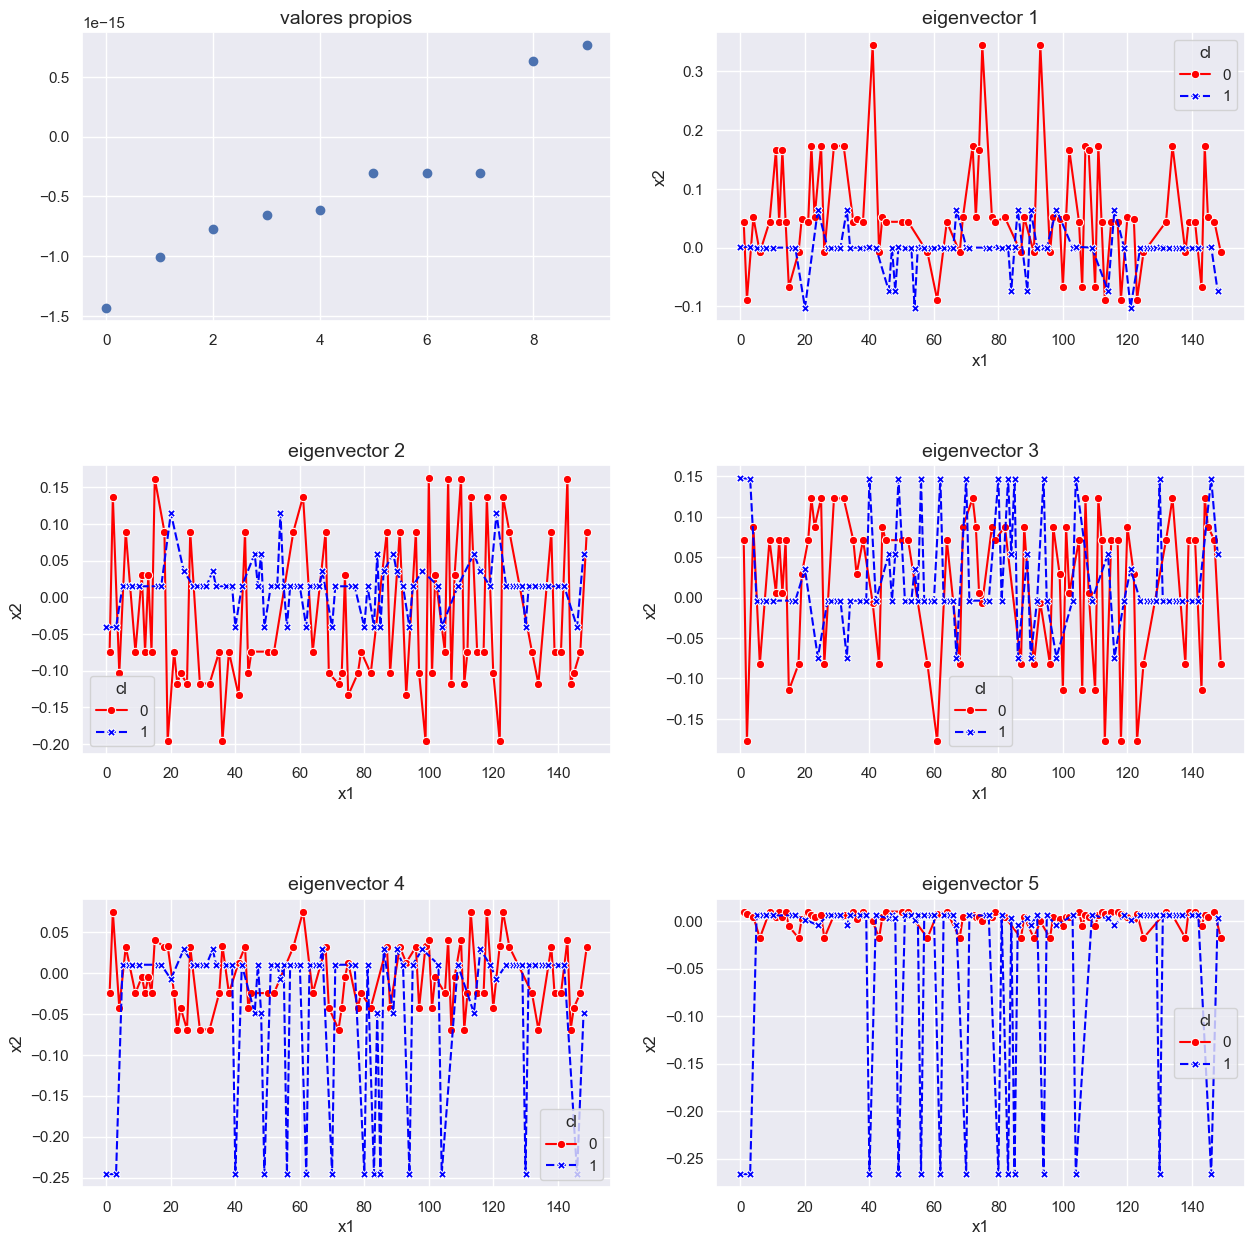

In [120]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),vals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(vecs.shape[0]),x2=vecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True);

### Variación y/o inestabilidad numérica

Debemos considerar el error numérico que puede surgir en éstos métodos, particularmente los basados en descomposiciones espectrales de matrices con estructuras determinadas.

Observa los resultados haciendo un simple redondeo

In [240]:
rvals = np.round(vals,3)
rvecs = np.round(vecs,3)

<Axes: title={'center': 'eigenvector 5'}, xlabel='x1', ylabel='x2'>

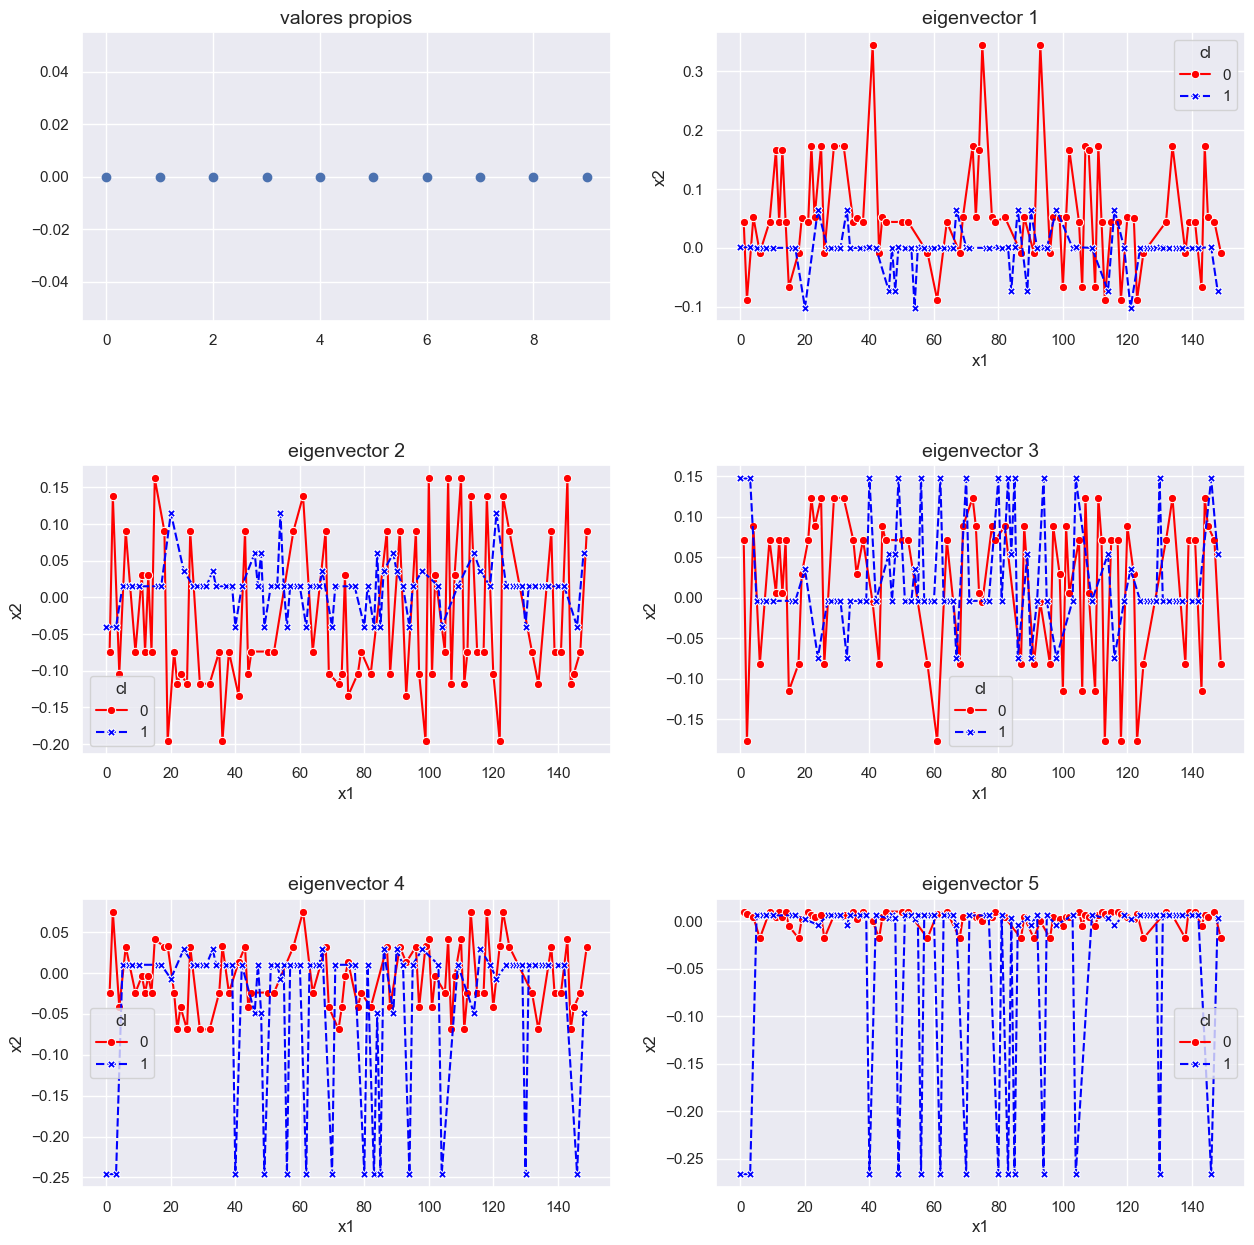

In [241]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),rvals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True);

Ahora, observa los subgrafos que se identifican **solamente con la información de los vectores propios** del Laplaciano. En la gráfica se muestra con un círculo, el subgrafo formado con los valores más grandes del vector (indicador) propio correspondiente `k_vec`

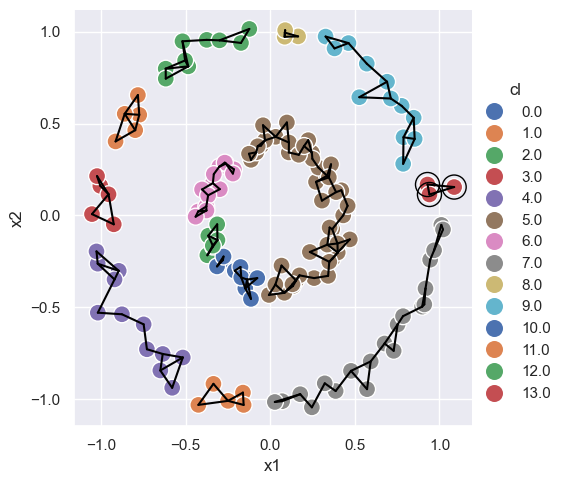

In [250]:
k_vec = 0 #el subgrafo correspondiente a algún valor propio 0
vec_i = rvecs[:,k_vec]
un = np.unique(vec_i)
np.where(vec_i==un[0])[0]
ind_i = np.zeros(vec_i.shape)
for i in range(un.shape[0]):
    ind_i[np.where(vec_i==un[i])[0]] = i

data_spec = pd.DataFrame(dict(x1 = X[:,0], x2 = X[:,1], cl = ind_i))
plot_graph(X, knn_graph, data_toy = data_spec, palet = sns.color_palette(n_colors=len(un)))

zeros = pd.DataFrame(X).iloc[np.where(vec_i==np.max(vec_i))[0]]
plt.scatter(zeros.iloc[:,0], zeros.iloc[:,1], s=300, linewidth=1, facecolors = 'none', edgecolors='black');

### Finalmente, realizamos $k-$means con el embedding obtenido

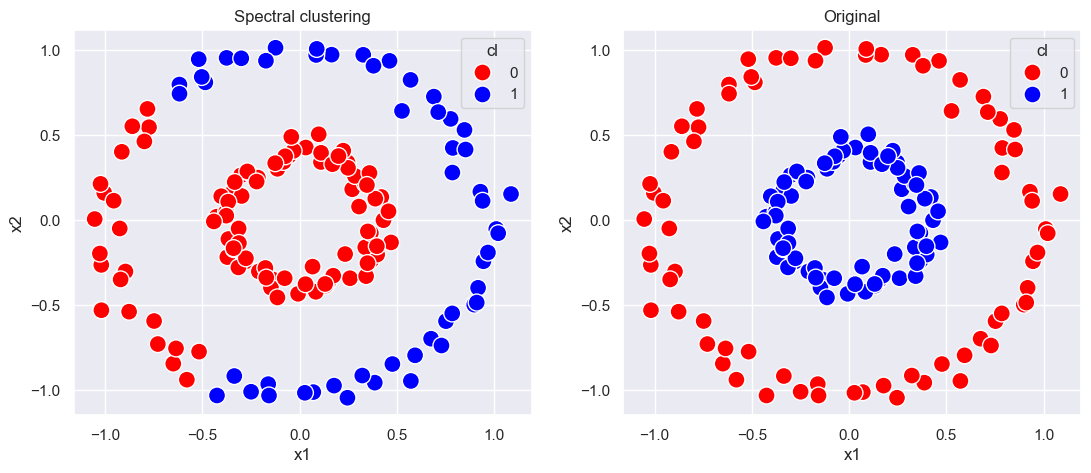

In [254]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0, n_init = 'auto')
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(13,5))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150);

## Ejemplo 2

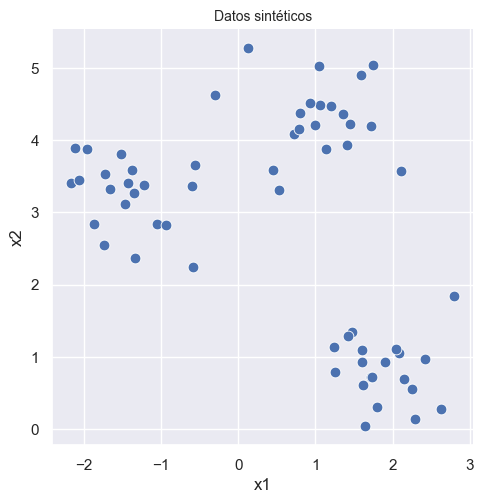

In [17]:
ndata = 60
X, y, custom_palette, kclust = get_dataset('blobs', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, height=5, s=60)
plt.title('Datos sintéticos', fontsize=10);

### Parámetros para clústering espectral

In [55]:
knn = 5 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'L' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [56]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

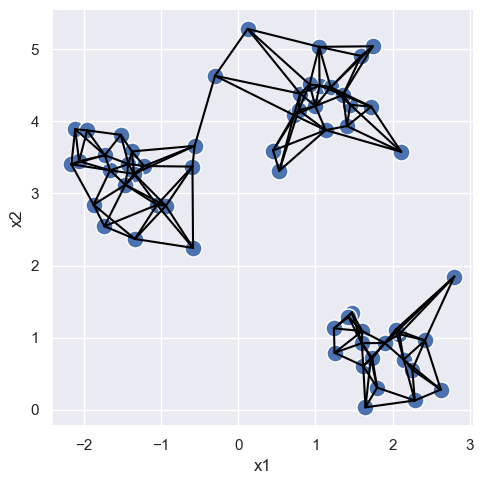

In [57]:
plot_graph(X,knn_graph)

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

In [58]:
rvals = np.round(vals,3)
rvecs = np.round(vecs,3)

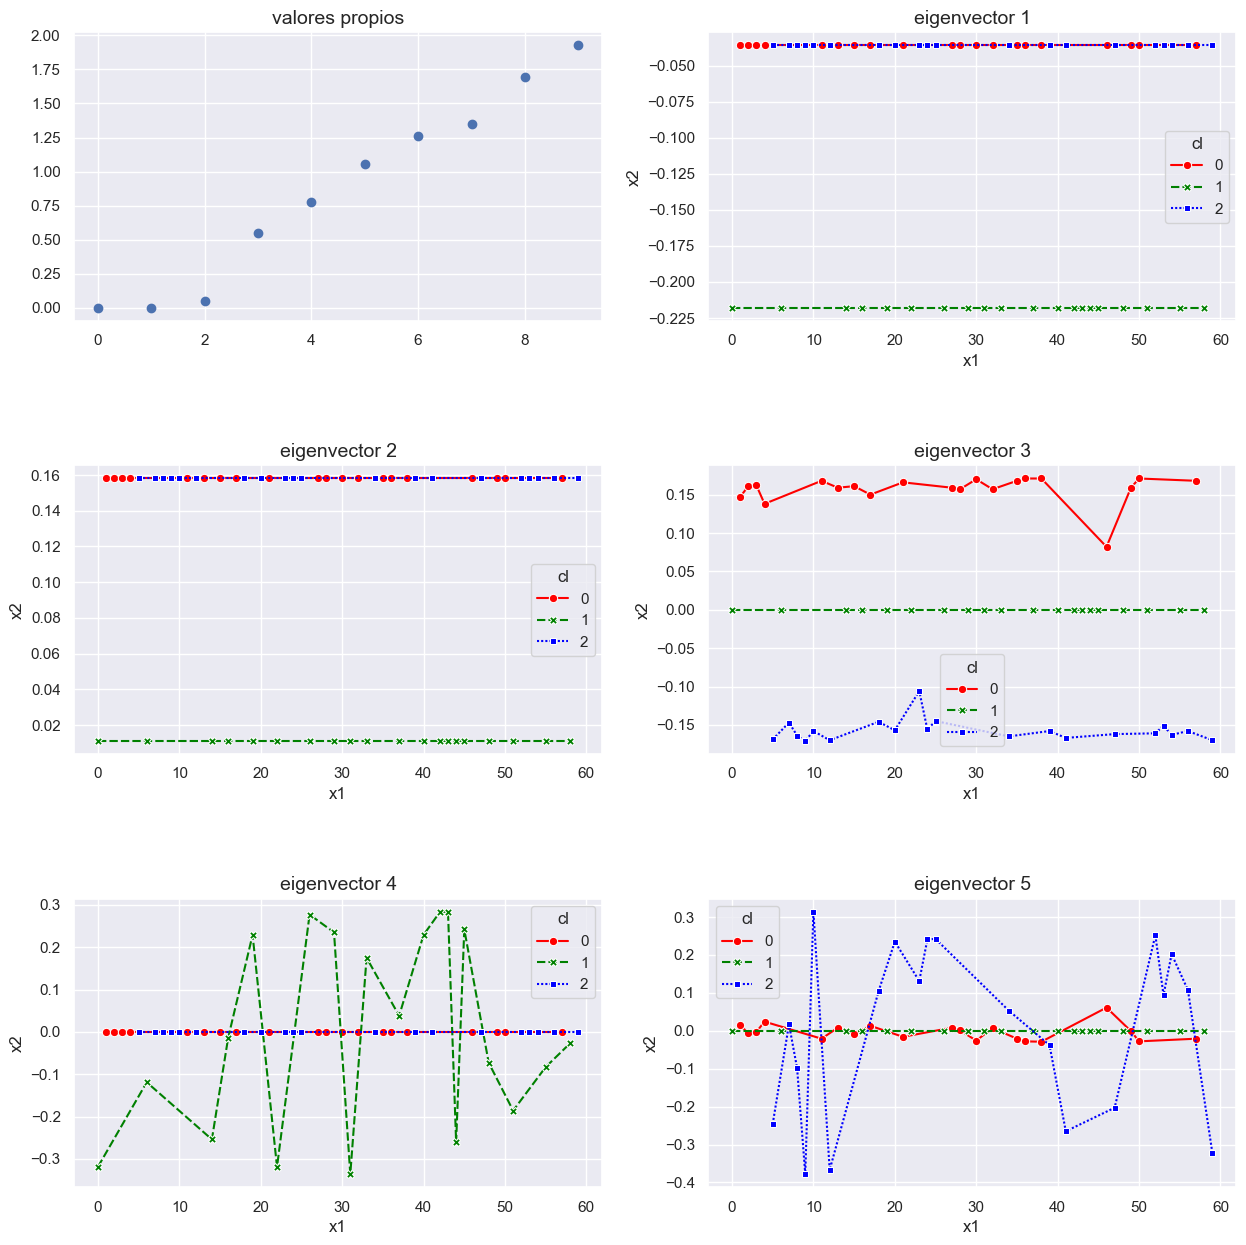

In [60]:
nv = 10
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),rvals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True);

Ahora, observa los subgrafos que se identifican **solamente con la información de los vectores propios** del Laplaciano. En la gráfica se muestra con un círculo, el subgrafo formado con los valores más grandes del vector (indicador) propio correspondiente `k_vec`

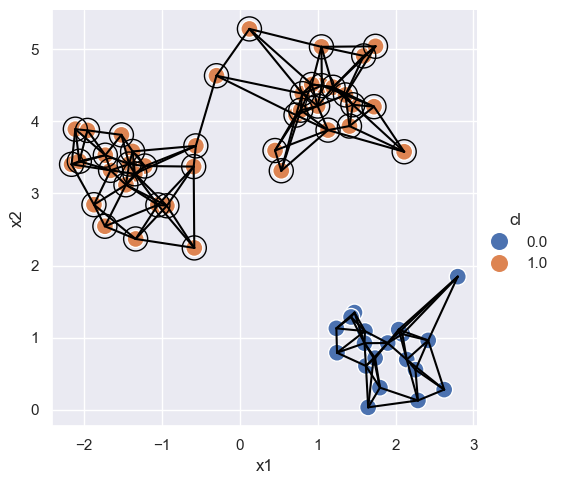

In [61]:
k_vec = 0 #el subgrafo correspondiente a algún valor propio 0
vec_i = rvecs[:,k_vec]
un = np.unique(vec_i)
np.where(vec_i==un[0])[0]
ind_i = np.zeros(vec_i.shape)
for i in range(un.shape[0]):
    ind_i[np.where(vec_i==un[i])[0]] = i

data_spec = pd.DataFrame(dict(x1 = X[:,0], x2 = X[:,1], cl = ind_i))
plot_graph(X, knn_graph, data_toy = data_spec, palet = sns.color_palette(n_colors=len(un)))

zeros = pd.DataFrame(X).iloc[np.where(vec_i==np.max(vec_i))[0]]
plt.scatter(zeros.iloc[:,0], zeros.iloc[:,1], s=300, linewidth=1, facecolors = 'none', edgecolors='black');

### Finalmente, realizamos $k-$means con el embedding obtenido

<Axes: title={'center': 'Original'}, xlabel='x1', ylabel='x2'>

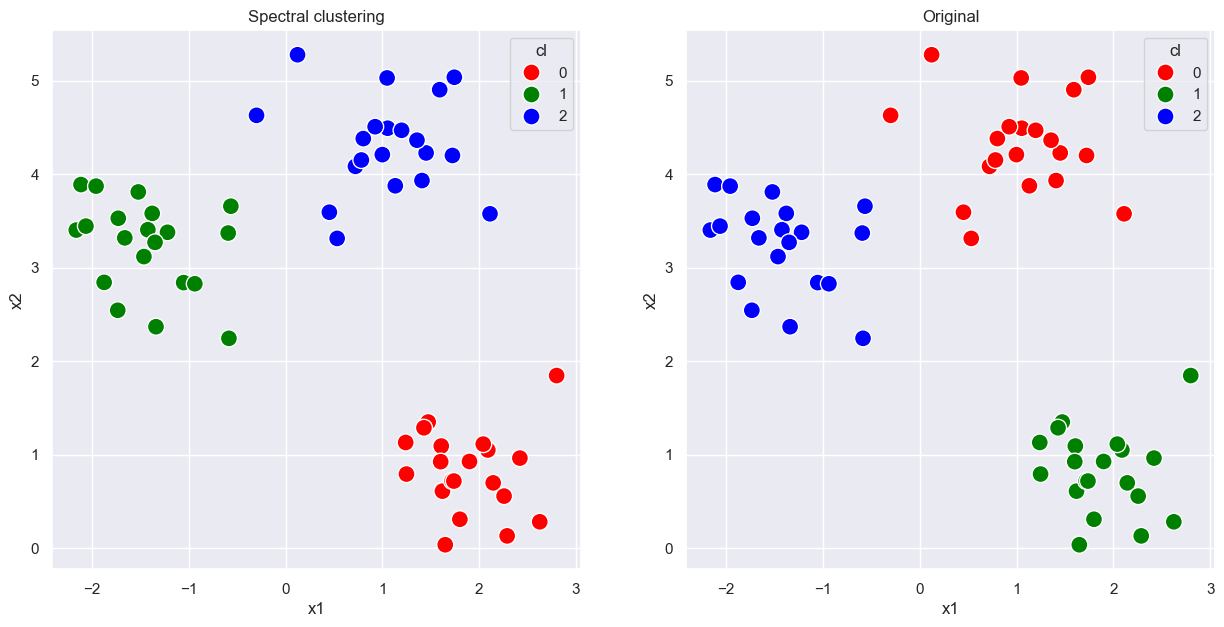

In [62]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0, n_init='auto')
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(15,7))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150)

## Ejemplo 3

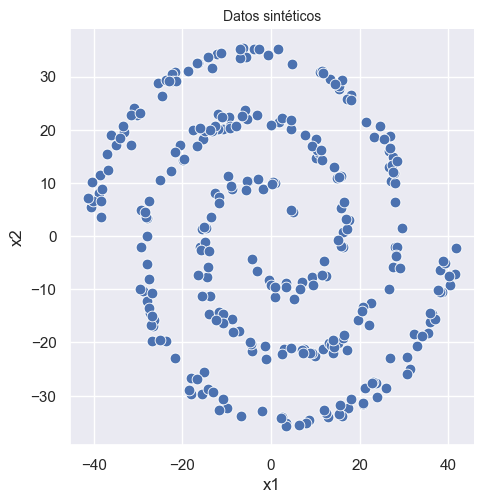

In [122]:
ndata = 150
X, y, custom_palette, kclust = get_dataset('spirals', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, height=5, s=60)
plt.title('Datos sintéticos', fontsize=10);

### Parámetros para clústering espectral

In [123]:
knn = 10 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano

### Realiza el embedding de los datos según el Laplaciano inducido por el grafo construido

In [124]:
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

### El grafo creado

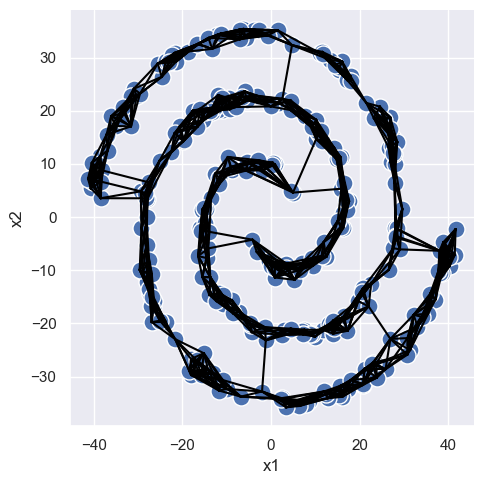

In [125]:
plot_graph(X,knn_graph)

### Matriz de Adyacencias o Afinidad

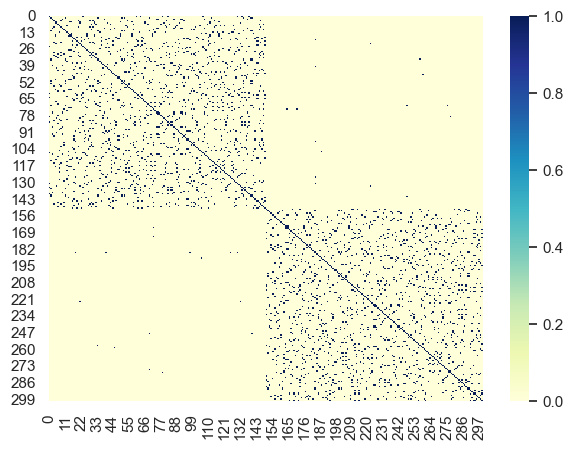

In [126]:
plt.figure(figsize=(7,5))
sns.heatmap(knn_graph, cmap="YlGnBu");

#### Matriz de adyacencias (afinidad) sin pesos. Solo muestra los componentes están conectados

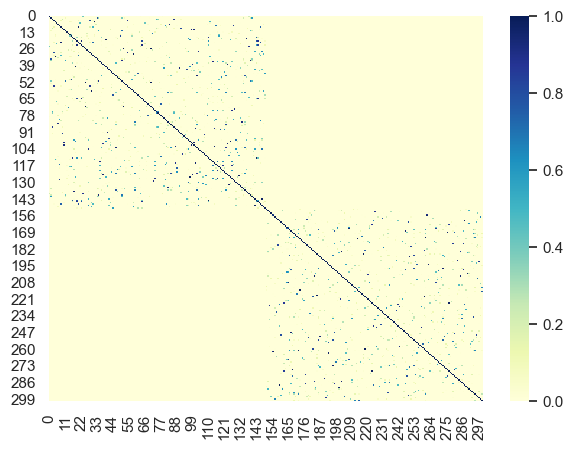

In [127]:
plt.figure(figsize=(7,5))
sns.heatmap(W, cmap="YlGnBu");

#### Matriz de adyacencias (afinidad) pesada usando distancia Gaussiana, es decir, con pesos $w_{i,j}=e^{\frac{-\Vert \mathbf{x}_i-\mathbf{x}_j \Vert^2}{2\sigma^2}}$ si $\mathbf{x}_i$ y $\mathbf{x}_j$ se conectan.

### Análisis espectral. Observa el tipo de Laplaciano que usamos ($L$, $L_{\text{sym}}$ ó $L_{\text{rw}}$)

In [86]:
rvals = np.round(vals,3)
rvecs = np.round(vecs,3)

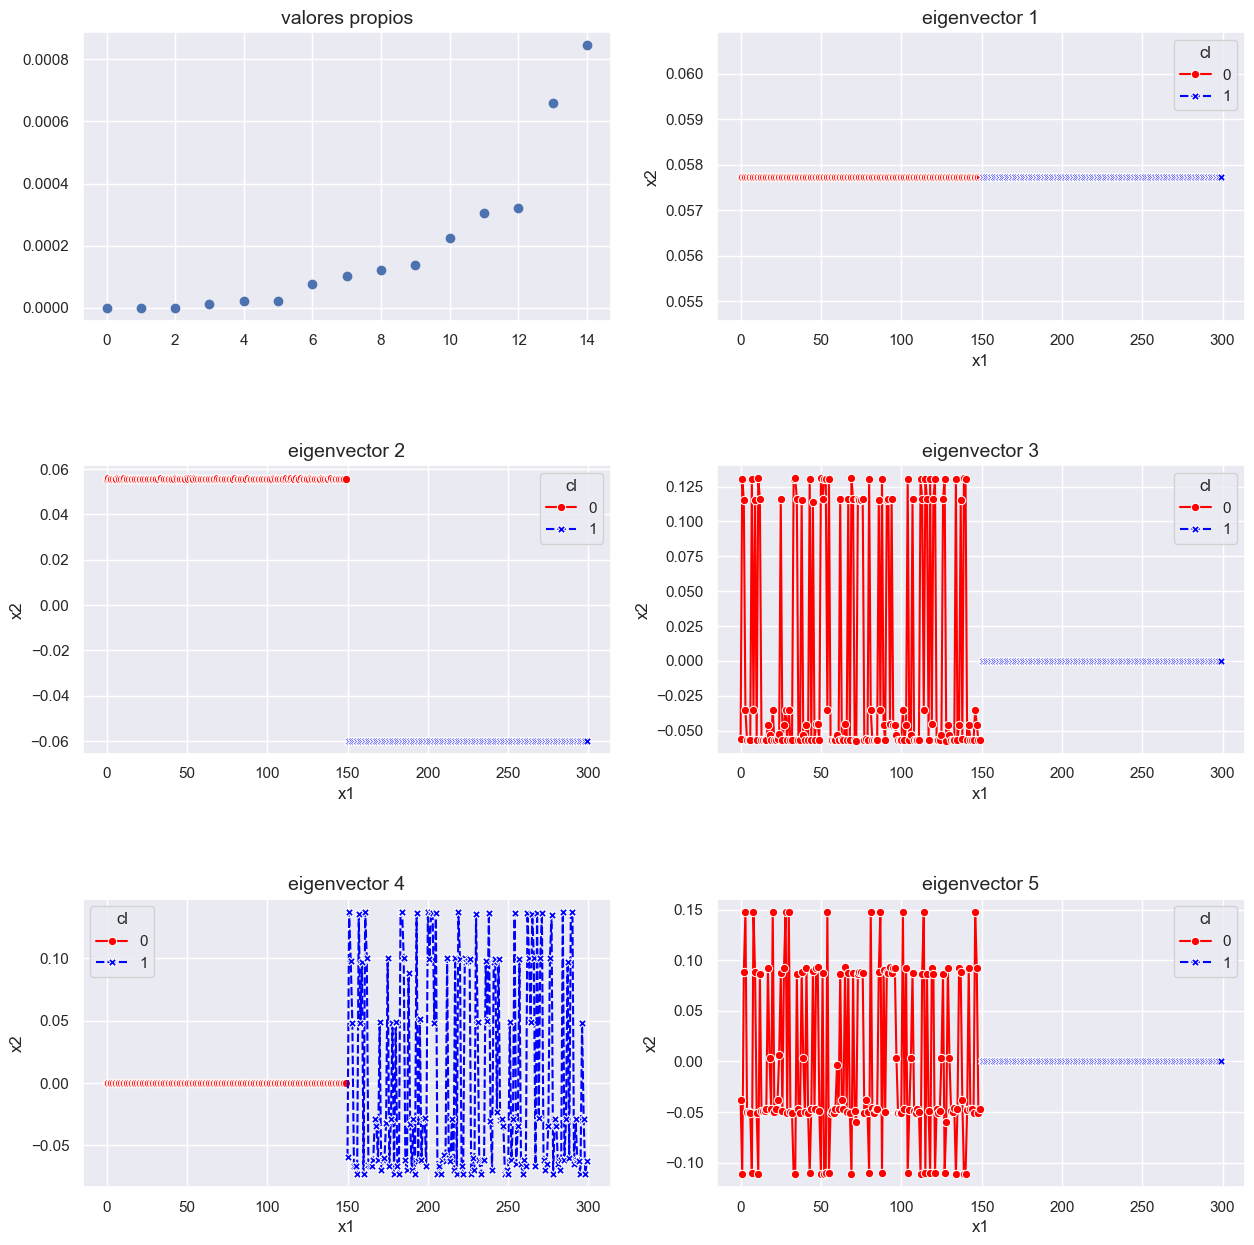

In [83]:
nv = 15
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = .5)
fig.add_subplot(321)
plt.title('valores propios', fontsize=14)
plt.scatter(range(nv),rvals[:nv])
fig.add_subplot(322)
plt.title('eigenvector 1', fontsize=14)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,0],cl=y))
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette, legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(323)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,1],cl=y))
plt.title('eigenvector 2', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(324)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,2],cl=y))
plt.title('eigenvector 3', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(325)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,3],cl=y))
plt.title('eigenvector 4', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True)
fig.add_subplot(326)
data_vecs = pd.DataFrame(dict(x1=range(rvecs.shape[0]),x2=rvecs[:,4],cl=y))
plt.title('eigenvector 5', fontsize=14)
sns.lineplot(x='x1', y='x2', data = data_vecs, hue='cl', palette = custom_palette,legend = 'brief',
               style = 'cl', markers = True);

Ahora, observa los subgrafos que se identifican **solamente con la información de los vectores propios** del Laplaciano. En la gráfica se muestra con un círculo, el subgrafo formado con los valores más grandes del vector (indicador) propio correspondiente `k_vec`

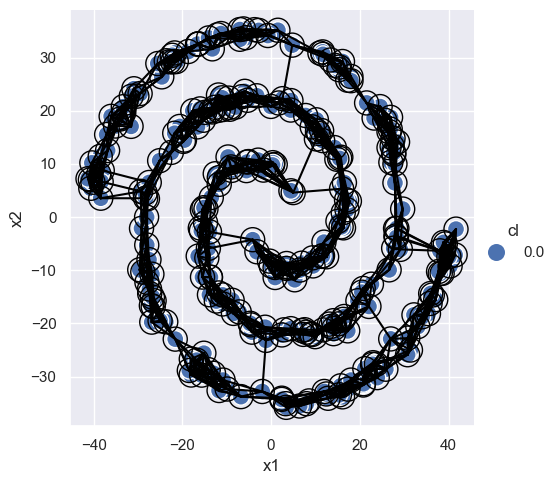

In [128]:
k_vec = 0 #el subgrafo correspondiente a algún valor propio 0
vec_i = rvecs[:,k_vec]
un = np.unique(vec_i)
np.where(vec_i==un[0])[0]
ind_i = np.zeros(vec_i.shape)
for i in range(un.shape[0]):
    ind_i[np.where(vec_i==un[i])[0]] = i

data_spec = pd.DataFrame(dict(x1 = X[:,0], x2 = X[:,1], cl = ind_i))
plot_graph(X, knn_graph, data_toy = data_spec, palet = sns.color_palette(n_colors=len(un)))

zeros = pd.DataFrame(X).iloc[np.where(vec_i==np.max(vec_i))[0]]
plt.scatter(zeros.iloc[:,0], zeros.iloc[:,1], s=300, linewidth=1, facecolors = 'none', edgecolors='black');

### Finalmente, realizamos $k-$means con el embedding obtenido

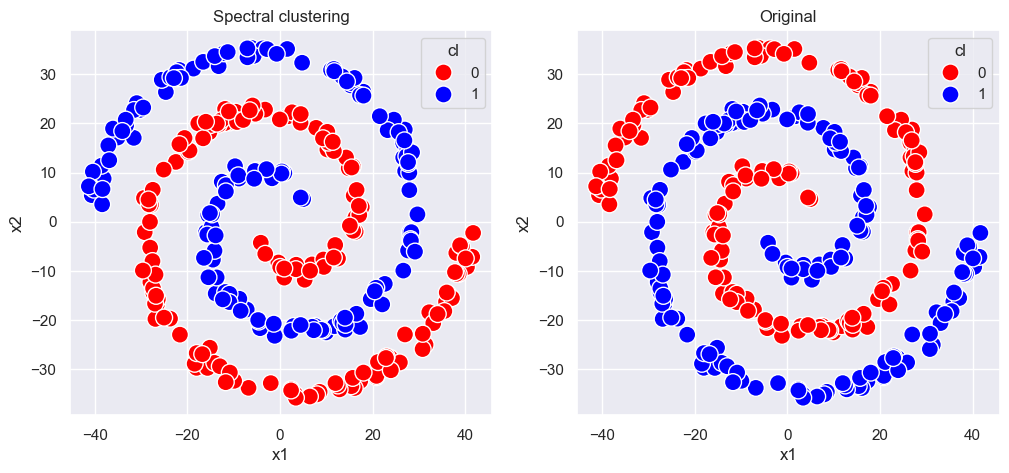

In [131]:
# kmeans
kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0, n_init = 'auto')
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150, 
            palette = custom_palette,legend = 'brief')
fig.add_subplot(122)
plt.title('Original')
sns.scatterplot(x='x1', y='x2', hue = 'cl', data = data_toy, palette=custom_palette, s=150);

## ¿Cómo es el `embedding`? La representación de nuestros datos inducido por el Laplaciano.

In [91]:
data_vecs = pd.DataFrame(np.hstack((rvecs[:,:5],y.reshape([y.shape[0],1]))))
data_vecs.columns = ['e1','e2','e3','e4','e5','cl']

### El embedding está dado por los vectores propios asociados a los valores propios más pequeños...

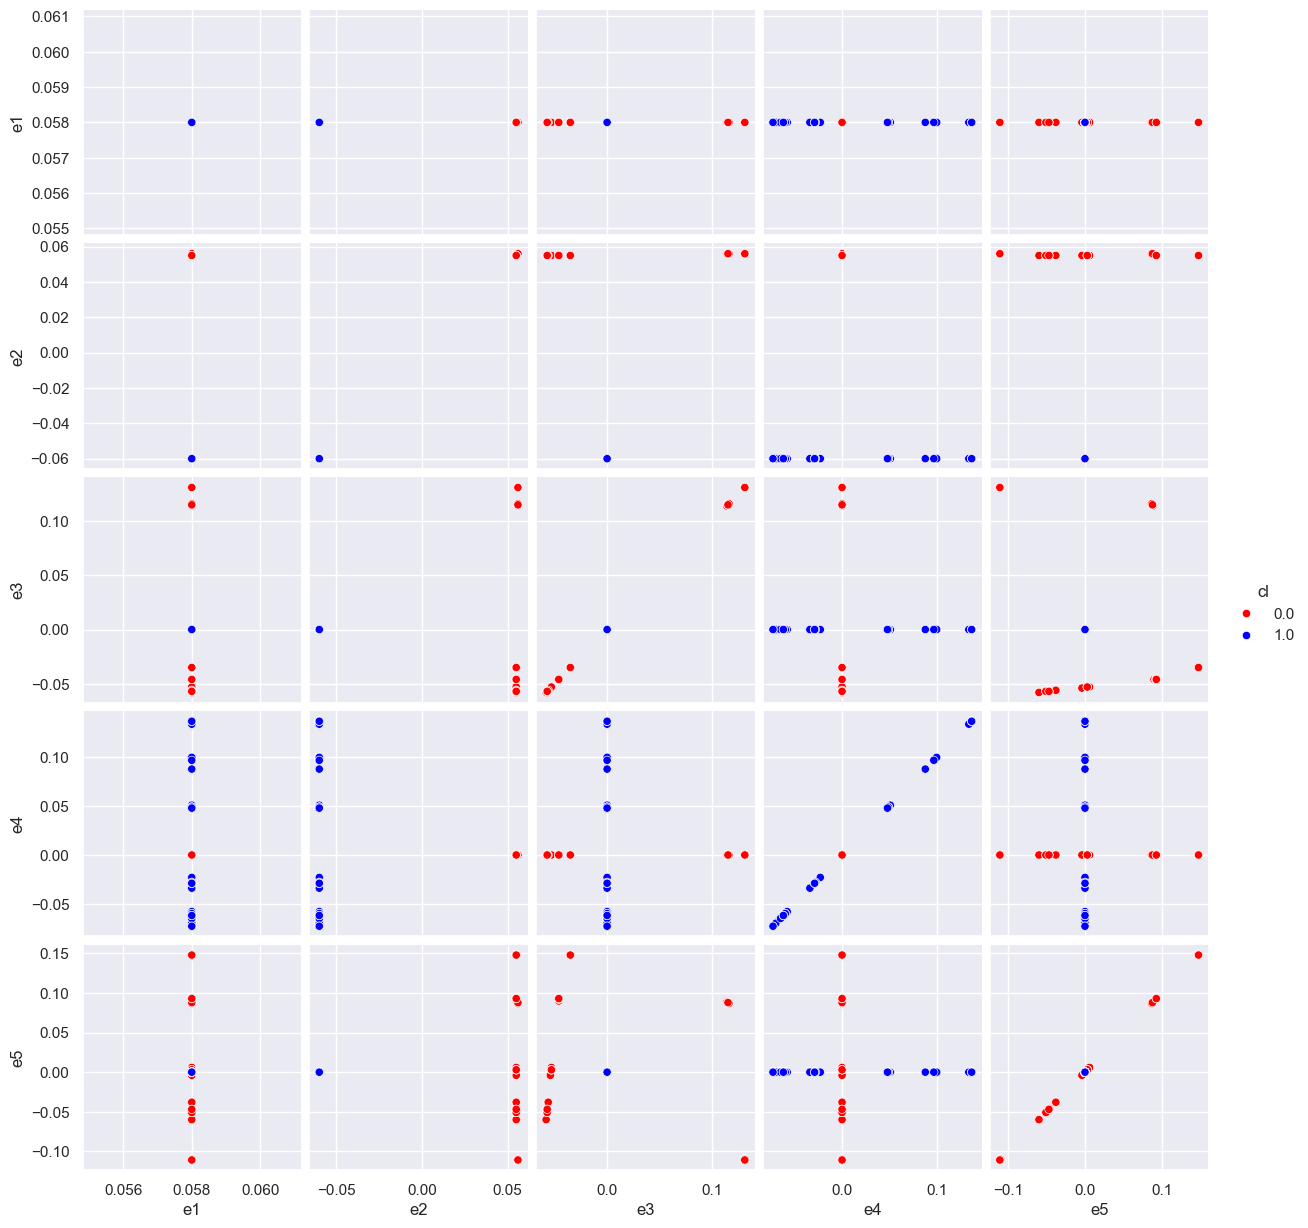

In [92]:
sns.pairplot(data_vecs,diag_kind=None, hue='cl', palette = custom_palette, kind='scatter');

## Spectral Clustering con `sklearn`

In [135]:
aff = 'nearest_neighbors'
#aff = 'rbf'
n_neigh = knn #12
sig = 1./sigma #5 
model = cluster.SpectralClustering(n_clusters=kclust,eigen_solver='arpack', affinity = aff, gamma = sig, n_neighbors = n_neigh).fit(X)

y_sc = model.labels_

La función es `SpectralClustering`, del módulo `cluster` de `sklearn`. Tenemos varias opciones para la matriz de afinidades, principalmente:
    - nearest_neighbors
    - rbf
    - precomputed
Checa la ayuda...

### Matriz de Afinidades

<Axes: >

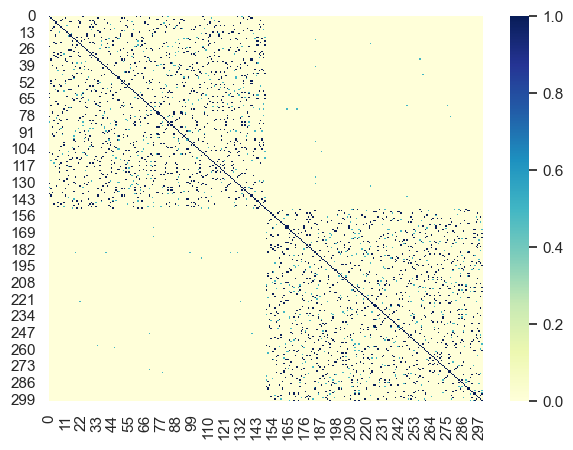

In [136]:
if aff == 'nearest_neighbors':
    w = model.affinity_matrix_.toarray()
else:
    w = model.affinity_matrix_

plt.figure(figsize=(7,5))
sns.heatmap(w, cmap="YlGnBu")

Text(0.5, 1.0, 'Spectral Clustering')

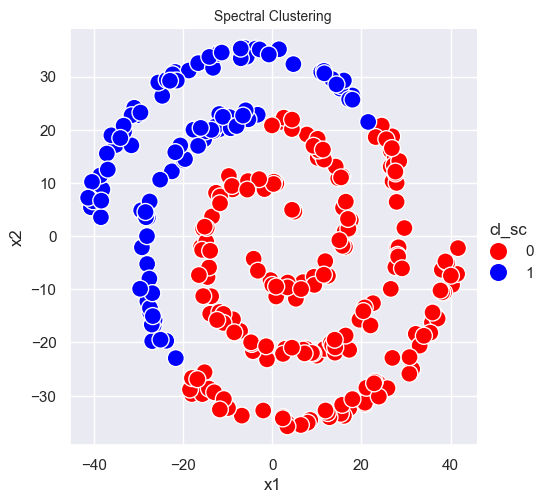

In [137]:
data_sc = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], cl_sc = y_sc))
sns.relplot(x='x1', y='x2', data = data_sc, hue='cl_sc', height=5, palette = custom_palette, s = 150)
plt.title('Spectral Clustering', fontsize=10)

## El embedding con `SpectralEmbedding` de `sklearn.manifold`

<Axes: >

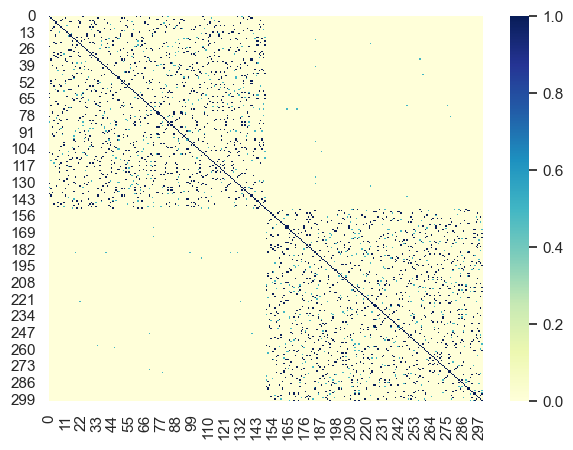

In [138]:
from sklearn.manifold import SpectralEmbedding

model2 = SpectralEmbedding(n_components=4,affinity='nearest_neighbors',gamma=sigma,eigen_solver='arpack',
                           n_neighbors=knn).fit(X)

plt.figure(figsize=(7,5))
w2 = model2.affinity_matrix_.toarray()
sns.heatmap(w2, cmap="YlGnBu")

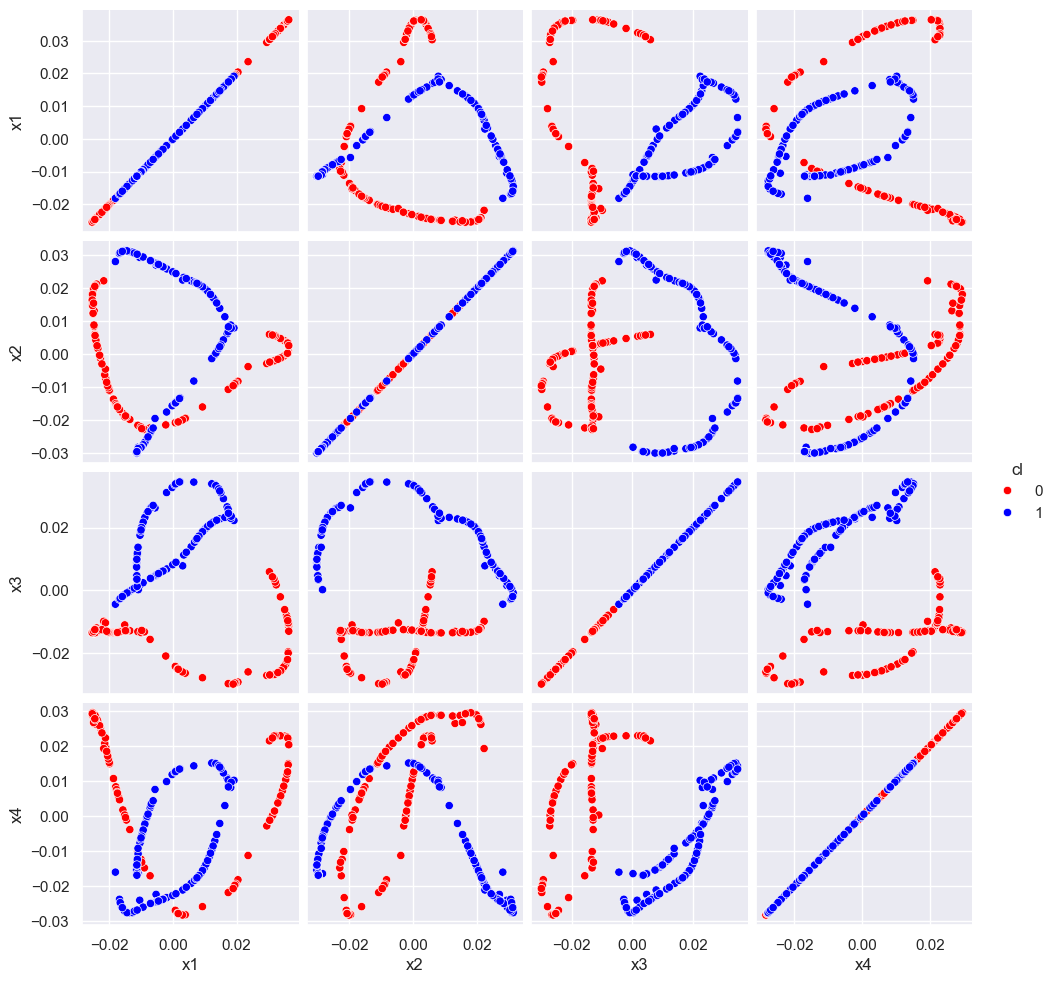

In [139]:
data_vecs_se = pd.DataFrame(dict(x1=model2.embedding_[:,0],x2=model2.embedding_[:,1],
                                 x3=model2.embedding_[:,2],x4=model2.embedding_[:,3],cl=y))
sns.pairplot(data_vecs_se,diag_kind=None, hue='cl', palette = custom_palette, kind='scatter');